In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# read the data

In [2]:
data=pd.read_csv('forestfires.csv')

In [3]:
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### change the object to numeric


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
data['month']=le.fit_transform(data['month'])
data['day']=le.fit_transform(data['day'])
data['size_category']=le.fit_transform(data['size_category'])

In [8]:
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0              1  
1         0              1  
2         0              1  
3         0              1  
4         0              1  

[5 rows x 31 columns]

In [9]:
data.shape

(517, 31)

### remove the duplicated

In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [11]:
data.duplicated().sum()

8

In [12]:
data[data.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  \
53       1    6  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...   
100      1    3  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...   
215      7    2  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...   
303      6    0  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...   
426      1    4  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...   
461      1    2  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...   
501      1    5  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...   
508      1    0  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         0         1         0         0   
303         0         0         0         1         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthoct  monthsep  size_category  
53          0         0              1  
100         0         0              1  
215         0         0              0  
303         0         0              1  
426         0         0              1  
461         0         0              1  
501         0         0              1  
508         0         0              1  

[8 rows x 31 columns]

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.reset_index(drop=True,inplace=True)

In [15]:
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0              1  
1         0              1  
2         0              1  
3         0              1  
4         0              1  

[5 rows x 31 columns]

In [16]:
data.duplicated().sum()

0

### null_values

In [17]:
data.isnull()

month    day   FFMC    DMC     DC    ISI   temp     RH   wind   rain  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   
506  False  False  False  False  False  False  False  False  False  False   
507  False  False  False  False  False  False  False  False  False  False   
508  False  False  False  False  False  False  False  False  False  False   

     ...  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0    ...     False     False     False     False     False     False   
1    ...     False     False     False     False     False     False   
2    ...     False     False     False     False     False     False   
3    ...     False     False     False     False     False     False   
4    ...     False     False     False     False     False     False   
..   ...       ...       ...       ...       ...       ...       ...   
504  ...     False     False     False     False     False     False   
505  ...     False     False     False     False     False     False   
506  ...     False     False     False     False     False     False   
507  ...     False     False     False     False     False     False   
508  ...     False     False     False     False     False     False   

     monthnov  monthoct  monthsep  size_category  
0       False     False     False          False  
1       False     False     False          False  
2       False     False     False          False  
3       False     False     False          False  
4       False     False     False          False  
..        ...       ...       ...            ...  
504     False     False     False          False  
505     False     False     False          False  
506     False     False     False          False  
507     False     False     False          False  
508     False     False     False          False  

[509 rows x 31 columns]

In [18]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

heatmaps

<Axes: >

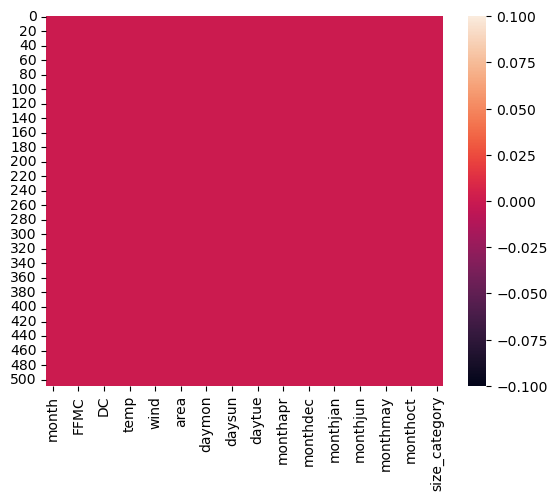

In [19]:
sns.heatmap(data.isnull())

In [20]:
data.describe()

month         day        FFMC         DMC          DC         ISI  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean     5.811395    2.736739   90.618075  110.235756  547.787623    9.023576   
std      4.376452    1.923090    5.555527   63.804112  248.196222    4.585083   
min      0.000000    0.000000   18.700000    1.100000    7.900000    0.000000   
25%      1.000000    1.000000   90.200000   62.300000  437.700000    6.400000   
50%      6.000000    3.000000   91.600000  108.300000  664.200000    8.400000   
75%     11.000000    4.000000   92.900000  141.300000  713.900000   11.000000   
max     11.000000    6.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain  ...    monthfeb  \
count  509.000000  509.000000  509.000000  509.000000  ...  509.000000   
mean    18.865422   44.253438    4.011395    0.020432  ...    0.039293   
std      5.841083   16.365192    1.800926    0.296261  ...    0.194482   
min      2.200000   15.000000    0.400000    0.000000  ...    0.000000   
25%     15.400000   32.000000    2.700000    0.000000  ...    0.000000   
50%     19.300000   42.000000    4.000000    0.000000  ...    0.000000   
75%     22.800000   53.000000    4.900000    0.000000  ...    0.000000   
max     33.300000  100.000000    9.400000    6.400000  ...    1.000000   

         monthjan    monthjul    monthjun    monthmar    monthmay    monthnov  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean     0.003929    0.062868    0.031434    0.104126    0.003929    0.001965   
std      0.062622    0.242965    0.174660    0.305724    0.062622    0.044324   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthoct    monthsep  size_category  
count  509.000000  509.000000     509.000000  
mean     0.029470    0.337917       0.728880  
std      0.169285    0.473466       0.444975  
min      0.000000    0.000000       0.000000  
25%      0.000000    0.000000       0.000000  
50%      0.000000    0.000000       1.000000  
75%      0.000000    1.000000       1.000000  
max      1.000000    1.000000       1.000000  

[8 rows x 31 columns]

corralation

In [21]:
data.corr()

month       day      FFMC       DMC        DC       ISI  \
month          1.000000 -0.149053 -0.003122 -0.161662  0.231234 -0.172492   
day           -0.149053  1.000000  0.073244  0.068438  0.053815  0.113982   
FFMC          -0.003122  0.073244  1.000000  0.382925  0.331956  0.531926   
DMC           -0.161662  0.068438  0.382925  1.000000  0.681446  0.309459   
DC             0.231234  0.053815  0.331956  0.681446  1.000000  0.229757   
ISI           -0.172492  0.113982  0.531926  0.309459  0.229757  1.000000   
temp          -0.069237  0.151230  0.431744  0.470875  0.496608  0.395858   
RH            -0.097232 -0.109650 -0.306262  0.062772 -0.047971 -0.135955   
wind          -0.140640 -0.035736 -0.030409 -0.104563 -0.202856  0.104834   
rain          -0.072934  0.047466  0.052280  0.071017  0.033772  0.062132   
area           0.028569  0.019449  0.040998  0.076932  0.051542  0.008429   
dayfri         0.115133 -0.628775  0.020889 -0.011152 -0.001642  0.051599   
daymon         0.091731 -0.372849 -0.057581 -0.105205 -0.053198 -0.159333   
daysat        -0.005542 -0.168048 -0.021744 -0.003147 -0.029112 -0.037140   
daysun        -0.074427  0.065216 -0.088579  0.028050 -0.002249 -0.005213   
daythu        -0.035790  0.240366  0.073127  0.079932  0.047835 -0.019173   
daytue        -0.038366  0.442757  0.007268 -0.002803  0.026066  0.062274   
daywed        -0.064740  0.579075  0.094854  0.021687  0.022670  0.125896   
monthapr      -0.178329  0.010625 -0.116738 -0.198536 -0.270129 -0.106785   
monthaug      -0.806997  0.171252  0.225720  0.490160  0.270894  0.337101   
monthdec      -0.116957 -0.020412 -0.136614 -0.177044 -0.106347 -0.162761   
monthfeb      -0.130043 -0.061764 -0.281054 -0.319691 -0.402201 -0.250494   
monthjan      -0.026021 -0.007739 -0.455128 -0.106256 -0.115871 -0.103846   
monthjul      -0.048068  0.031279  0.033137  0.000617 -0.101518  0.020932   
monthjun       0.007771  0.007104 -0.041972 -0.047759 -0.178719  0.119765   
monthmar       0.092683 -0.083862 -0.074706 -0.404974 -0.648890 -0.143589   
monthmay       0.031440 -0.056777 -0.036983 -0.082312 -0.115010 -0.060655   
monthnov       0.032357  0.052267 -0.088879 -0.074642 -0.078927 -0.076748   
monthoct       0.166938 -0.000309 -0.005172 -0.188126  0.094091 -0.071401   
monthsep       0.847822 -0.105329  0.080444  0.119779  0.538299 -0.069600   
size_category -0.024288 -0.005360 -0.024292 -0.046598 -0.028372  0.007867   

                   temp        RH      wind      rain  ...  monthfeb  \
month         -0.069237 -0.097232 -0.140640 -0.072934  ... -0.130043   
day            0.151230 -0.109650 -0.035736  0.047466  ... -0.061764   
FFMC           0.431744 -0.306262 -0.030409  0.052280  ... -0.281054   
DMC            0.470875  0.062772 -0.104563  0.071017  ... -0.319691   
DC             0.496608 -0.047971 -0.202856  0.033772  ... -0.402201   
ISI            0.395858 -0.135955  0.104834  0.062132  ... -0.250494   
temp           1.000000 -0.532503 -0.227754  0.067911  ... -0.319901   
RH            -0.532503  1.000000  0.070721  0.094343  ...  0.141593   
wind          -0.227754  0.070721  1.000000  0.059332  ... -0.028820   
rain           0.067911  0.094343  0.059332  1.000000  ... -0.013961   
area           0.099173 -0.074554  0.012623 -0.006511  ... -0.021205   
dayfri        -0.077766  0.069599  0.121056 -0.001723  ...  0.047592   
daymon        -0.135289  0.010311 -0.062712 -0.028473  ...  0.002649   
daysat         0.038863 -0.024118 -0.068421 -0.030252  ...  0.021400   
daysun         0.015661  0.140341  0.025971 -0.015749  ...  0.007987   
daythu         0.051864 -0.128270 -0.055820 -0.025236  ... -0.042571   
daytue         0.034738 -0.021152  0.052331  0.127243  ... -0.014599   
daywed         0.091309 -0.087122 -0.022181 -0.019189  ... -0.035839   
monthapr      -0.156825  0.021627  0.048864 -0.009262  ... -0.027133   
monthaug       0.349583  0.046842  0.027413  0.088572  ... -0.148305   
monthdec      -0.329774 -0.047670  0.2709

In [22]:
data.corr().sum()

month            0.229739
day              1.321903
FFMC             1.611275
DMC              1.829620
DC               1.726972
ISI              1.906624
temp             1.483901
RH               0.119422
wind             0.630023
rain             1.300934
area             0.877496
dayfri          -0.480988
daymon          -0.800607
daysat          -0.277326
daysun          -0.058856
daythu           0.278552
daytue           0.711117
daywed           0.853481
monthapr        -0.342229
monthaug         0.571770
monthdec        -0.406044
monthfeb        -1.288493
monthjan        -0.038314
monthjul         0.322590
monthjun         0.431256
monthmar        -1.453386
monthmay         0.510733
monthnov         0.578026
monthoct         0.287803
monthsep         0.555644
size_category    0.425984
dtype: float64

heatmap

<Axes: >

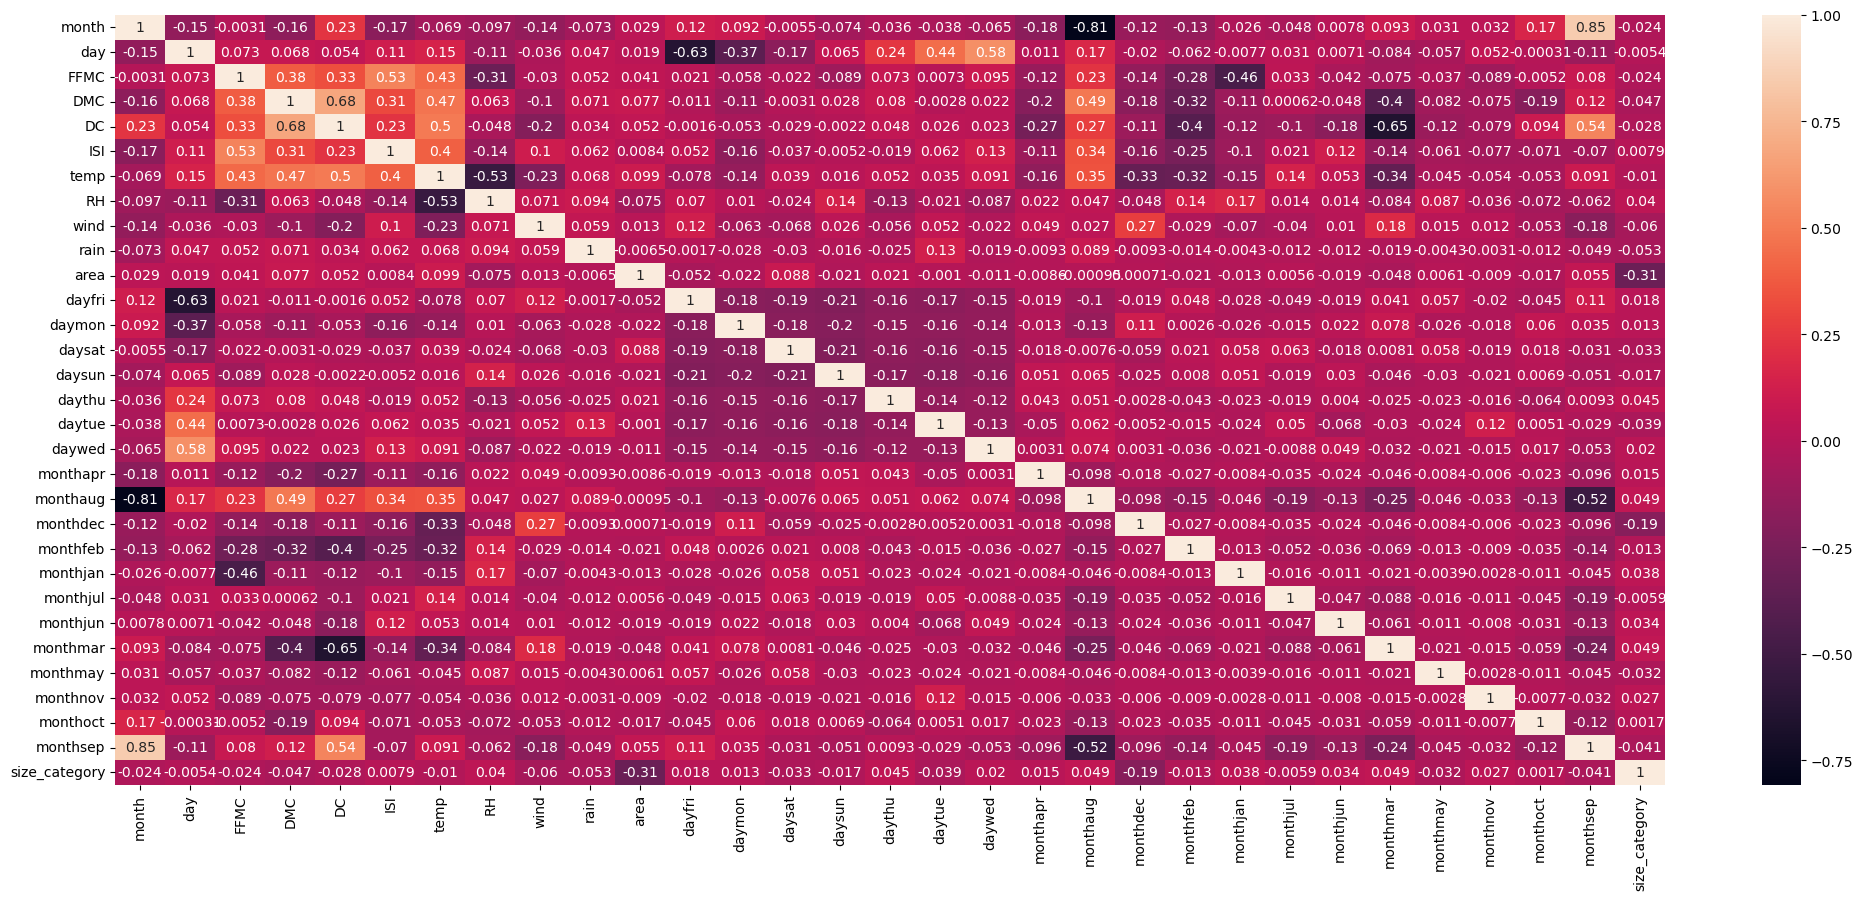

In [23]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True)

visualise the data

In [24]:
sns.pairplot(data,palette='mako',hue='month')
plt.show()

<Axes: >

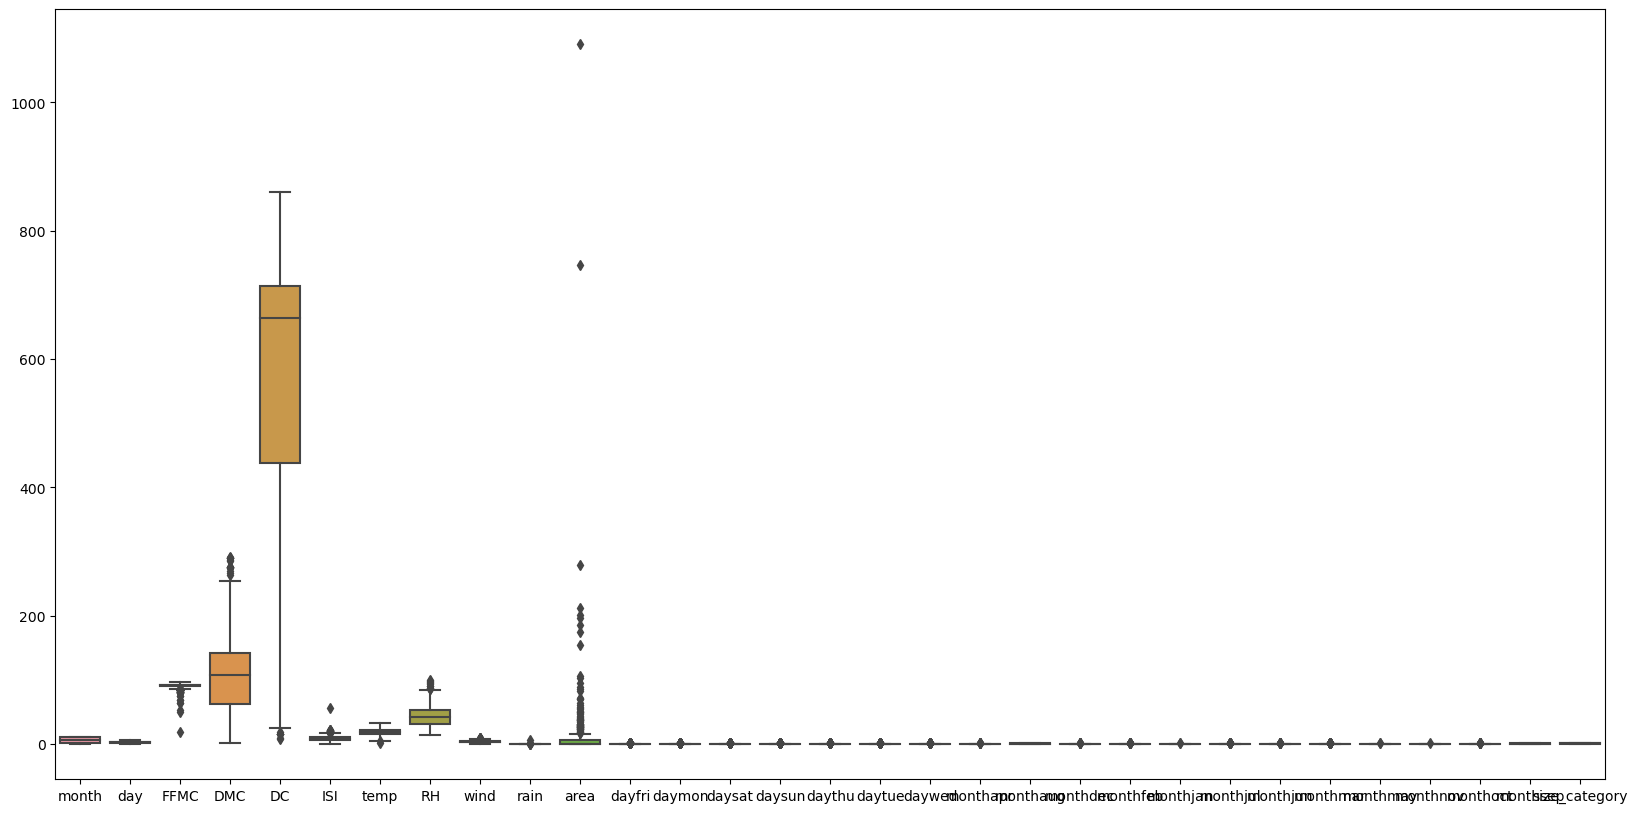

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data)

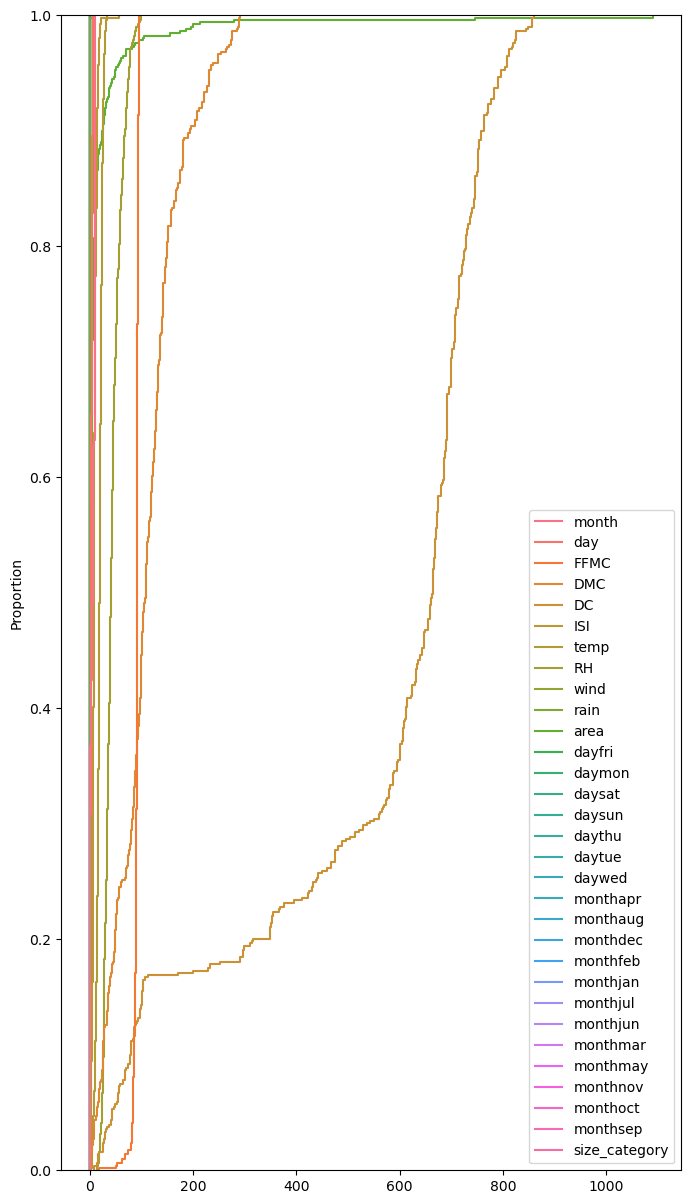

In [26]:
plt.figure(figsize=(8,15))
sns.ecdfplot(data)
plt.show()

### split the data

In [27]:
x=data.iloc[:,:30]
y=data.iloc[:,30]

In [28]:
x.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthdec  \
0      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  
0         0         0  
1         1         0  
2         1         0  
3         0         0  
4         0         0  

[5 rows x 30 columns]

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((407, 30), (102, 30), (407,), (102,))

# build the model

In [32]:
from sklearn.svm import SVC

In [33]:
model=SVC(C=0.5,gamma=0.01,kernel='rbf',probability=True)

In [34]:
model.fit(x_train,y_train)

SVC(C=0.5, gamma=0.01, probability=True)

### check the matrix and report

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

### predicted the training and testing data

In [36]:
train_pred=model.predict(x_train)

In [37]:
test_pred=model.predict(x_test)

In [38]:
train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [39]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### training metrix and report

In [40]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[ 10,  99],
       [  0, 298]], dtype=int64)

heatmap

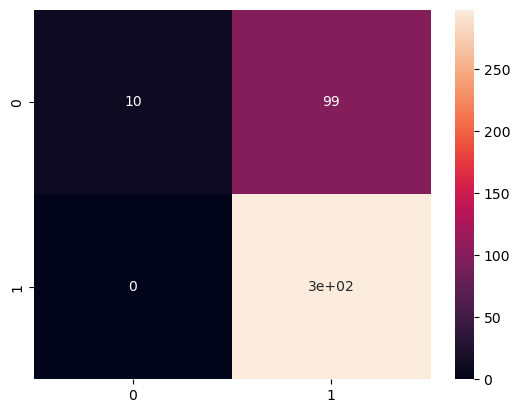

In [41]:
sns.heatmap(data=cm,annot=True)
plt.show()

In [42]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17       109
           1       0.75      1.00      0.86       298

    accuracy                           0.76       407
   macro avg       0.88      0.55      0.51       407
weighted avg       0.82      0.76      0.67       407



In [43]:
train_proba = model.predict_proba(x_train)

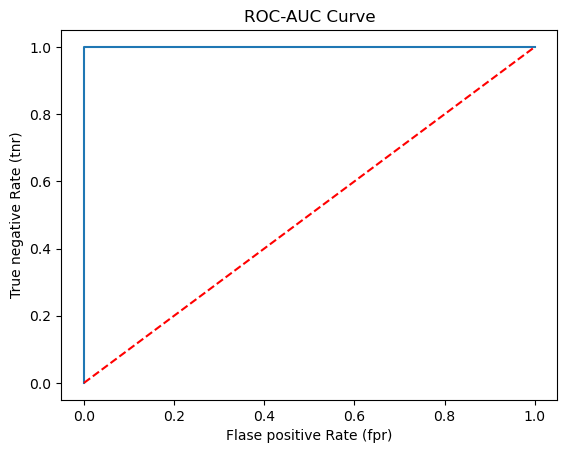

In [44]:
fpr,tpr,thresh=roc_curve(y_train,train_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

### testing metrix and report

In [45]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[ 0, 29],
       [ 0, 73]], dtype=int64)

heatmap

<Axes: >

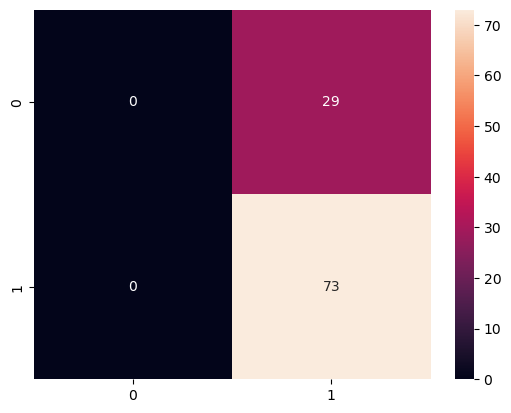

In [46]:
sns.heatmap(cm,annot=True)

In [47]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.72      1.00      0.83        73

    accuracy                           0.72       102
   macro avg       0.36      0.50      0.42       102
weighted avg       0.51      0.72      0.60       102



In [48]:
test_proba=model.predict_proba(x_test)

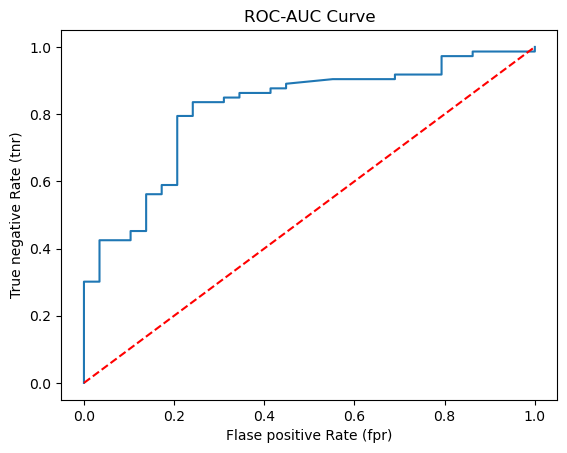

In [49]:
fpr,tpr,thresh=roc_curve(y_test,test_proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC-AUC Curve')
plt.xlabel('Flase positive Rate (fpr)')
plt.ylabel('True negative Rate (tnr)')
plt.show()

 # GridSearech

# use GridSearech to find the right hyper parameter values


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
data=[
    {
        'C':[0.4,0.45,0.5,0.55],
        'gamma':[0.1,0.01,0.001,0.0001]
    }
]

In [52]:
grid=GridSearchCV(model,param_grid=data,cv=10)

In [53]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(C=0.5, gamma=0.01, probability=True),
             param_grid=[{'C': [0.4, 0.45, 0.5, 0.55],
                          'gamma': [0.1, 0.01, 0.001, 0.0001]}])

In [54]:
train_pred=model.predict(x_train)

In [55]:
confusion_matrix(y_train,train_pred)

array([[ 10,  99],
       [  0, 298]], dtype=int64)

In [56]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17       109
           1       0.75      1.00      0.86       298

    accuracy                           0.76       407
   macro avg       0.88      0.55      0.51       407
weighted avg       0.82      0.76      0.67       407



In [57]:
test_pred=model.predict(x_test)

In [58]:
confusion_matrix(y_test,test_pred)

array([[ 0, 29],
       [ 0, 73]], dtype=int64)

In [59]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.72      1.00      0.83        73

    accuracy                           0.72       102
   macro avg       0.36      0.50      0.42       102
weighted avg       0.51      0.72      0.60       102



# TSNE plot

In [60]:
from sklearn.manifold import TSNE

In [63]:
vmodel = TSNE(n_components=2)
tsne_comps = vmodel.fit_transform(x)

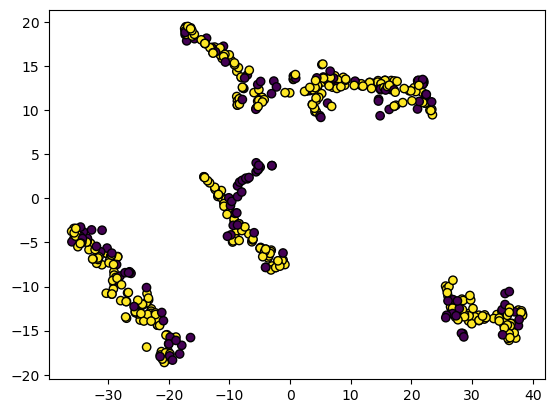

In [62]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolor='k')
plt.show()